In [1]:
#FUNCTION DEFINITION

import csv
import random
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def loadCsv(filename):
	lines = csv.reader(open(filename, "rb"))
	dataset = list(lines)
	for i in range(len(dataset)):
		dataset[i] = [float(x) for x in dataset[i]]
	return dataset

def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]

def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
	avg = mean(numbers)
	variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
	return math.sqrt(variance)

def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries

def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.iteritems():
		summaries[classValue] = summarize(instances)
	return summaries

def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.iteritems():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
    
def calculateClassProbability(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.iteritems():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities= calculateProbability(x, mean, stdev)
	return probabilities
			
    
def getProbabilities(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = calculateClassProbability(summaries, testSet[i])
		predictions.append(result)
	return predictions
    
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.iteritems():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions

def getAccuracy(testSet, predictions):
	correct = 0
	for i in range(len(testSet)):
		if testSet[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0

def calculateOutlier(testprobabilities):
    positiveclass = []
    for i in range(len(testprobabilities)) :
        if testprobabilities[i] > threshold:
            positiveclass.append(1)
        else:
            positiveclass.append(0)
    positivepercentage = float(sum(positiveclass)) / len(positiveclass)
    return positivepercentage

In [ ]:
################################## SCHEDULED CASTE ############################

In [14]:
# prepare model
filenorth = 'SC_import_north_NB.csv'
trainingSet = loadCsv(filenorth)

filesouth = 'SC_import_south_NB.csv'
testSet = loadCsv(filesouth)

#summary (mean, std dev) of each attribute in the training set
summaries = summarizeByClass(trainingSet)

In [15]:
#Bayesian Probabilities of the Training Set
initialprobabilities = getProbabilities(summaries, trainingSet)
print "Min probability of the dataset is %s" %(min(initialprobabilities))
print "Max probability of the dataset is %s" %(max(initialprobabilities))
print "Total number of samples in the dataset is %s" %(len(initialprobabilities))

Min probability of the dataset is 0.00374818252462
Max probability of the dataset is 6.10507183999
Total number of samples in the dataset is 458


In [16]:
#Set threshold for novelty/outlier detection as minimum value of the bayesian probabilities from the training set
threshold = min(initialprobabilities)
print threshold

0.00374818252462


In [17]:
#Calculate the percentage of the test set which is considered novel/outlier from the training set
testprobabilities = getProbabilities(summaries, testSet)       
calculateOutlier(testprobabilities)

0.9948186528497409

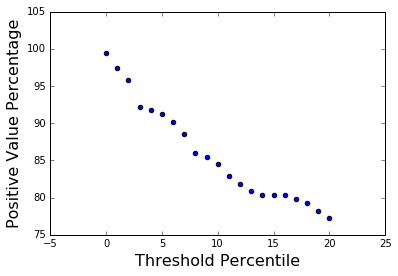

In [6]:
#set sensitivity test for threshold between 0-20%
thresholdpercentage = range(0, 21)

positivepercentagelist = []
for i in thresholdpercentage:
    threshold = np.percentile(initialprobabilities, i)  # return ith percentile
    positivepercentage = calculateOutlier(testprobabilities) * 100
    positivepercentagelist.append(positivepercentage)
    
plt.scatter(thresholdpercentage, positivepercentagelist)
plt.xlabel('Threshold Percentile', fontsize=16)
plt.ylabel('Positive Value Percentage', fontsize=16)
plt.show()

In [7]:
################################## SCHEDULED TRIBE ############################

In [8]:
# prepare model
filenorth = 'ST_import_north_NB.csv'
trainingSet = loadCsv(filenorth)

filesouth = 'ST_import_south_NB.csv'
testSet = loadCsv(filesouth)

#summary (mean, std dev) of each attribute in the training set
summaries = summarizeByClass(trainingSet)

In [9]:
#Bayesian Probabilities of the Training Set
initialprobabilities = getProbabilities(summaries, trainingSet)
print "Min probability of the dataset is %s" %(min(initialprobabilities))
print "Max probability of the dataset is %s" %(max(initialprobabilities))
print "Total number of samples in the dataset is %s" %(len(initialprobabilities))

Min probability of the dataset is 4.59292523789e-07
Max probability of the dataset is 5.09520948804
Total number of samples in the dataset is 392


In [10]:
#Set threshold for novelty/outlier detection as minimum value of the bayesian probabilities from the training set
threshold = min(initialprobabilities)
print threshold

4.59292523789e-07


In [11]:
#Calculate the percentage of the test set which is considered novel/outlier from the training set
testprobabilities = getProbabilities(summaries, testSet)       
calculateOutlier(testprobabilities)

1.0

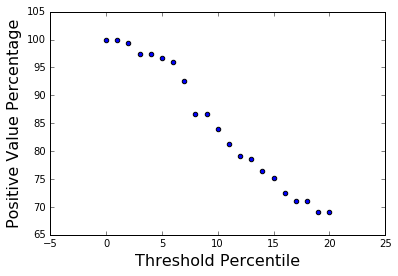

In [12]:
#set sensitivity test for threshold between 0-20%
thresholdpercentage = range(0, 21)

positivepercentagelist = []
for i in thresholdpercentage:
    threshold = np.percentile(initialprobabilities, i)  # return ith percentile
    positivepercentage = calculateOutlier(testprobabilities) * 100
    positivepercentagelist.append(positivepercentage)
    
plt.scatter(thresholdpercentage, positivepercentagelist)
plt.xlabel('Threshold Percentile', fontsize=16)
plt.ylabel('Positive Value Percentage', fontsize=16)
plt.show()